### Flight Data Exploration


#### Wrangling

> This dataset is from Bureau of Transportation Statistics. It tracks the on time performance of domestic flights operated by large air carriers. The dataset is for each year and can be downloaded directly from their website. The description is posted on their website in detail. 

> For this data analysis, we will be looking at data from the years 2006 to 2008.

### Importing libraries

In [70]:
# Import all packages and set plots to be embedded inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib.patches as mpatches
%matplotlib inline
import calendar

### Loading dataset and saving in dataframe

In [2]:
# Read CSV files from 2007 - 2008
df_Yr07 = pd.read_csv("2007.csv.bz2", encoding='latin-1', compression='bz2')
df_Yr08 = pd.read_csv("2008.csv.bz2", encoding='latin-1', compression='bz2')

In [3]:
#Append the four dataframes into a single source
df_05060708=df_Yr07.append([df_Yr08])

In [4]:
#
df_05060708.sample(30)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
6715241,2007,11,30,5,1325.0,1325,1434.0,1425,AA,418,...,12.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4614423,2007,8,7,2,1314.0,1312,1605.0,1622,UA,762,...,8.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3639965,2007,6,7,4,1431.0,1440,1629.0,1639,B6,1089,...,4.0,33.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2832670,2007,5,27,7,1152.0,1155,1227.0,1232,HA,528,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3713248,2007,7,5,4,734.0,735,815.0,825,WN,1294,...,6.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2440922,2007,4,16,1,829.0,830,949.0,955,DL,401,...,7.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
493036,2008,1,14,1,1851.0,1900,2308.0,2310,AA,804,...,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5675239,2007,10,24,3,825.0,830,935.0,940,WN,2778,...,5.0,14.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7131808,2007,12,25,2,2204.0,2205,2302.0,2321,US,1852,...,2.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4103267,2007,7,1,7,850.0,855,1120.0,1110,HA,19,...,3.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### Assesing & Cleaning Data

In [5]:
print(df_05060708.shape)

(9842432, 29)


In [6]:
df_05060708.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
# check which columns have missing values with info()
df_05060708.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9842432 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
df_05060708.isnull()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2389213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2389214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2389215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True


In [9]:
# check for duplicates in the data
sum(df_05060708.duplicated())

31

In [10]:
# drop duplicates
df_05060708.drop_duplicates(inplace=True)

In [11]:
# confirm correction by rechecking for duplicates in the data
sum(df_05060708.duplicated())

0

In [12]:
df_05060708.count()

Year                 9842401
Month                9842401
DayofMonth           9842401
DayOfWeek            9842401
DepTime              9617211
CRSDepTime           9842401
ArrTime              9594378
CRSArrTime           9842401
UniqueCarrier        9842401
FlightNum            9842401
TailNum              9799927
ActualElapsedTime    9594378
CRSElapsedTime       9841000
AirTime              9594378
ArrDelay             9594378
DepDelay             9617211
Origin               9842401
Dest                 9842401
Distance             9842401
TaxiIn               9772305
TaxiOut              9777959
Cancelled            9842401
CancellationCode      225191
Diverted             9842401
CarrierDelay         8037769
WeatherDelay         8037769
NASDelay             8037769
SecurityDelay        8037769
LateAircraftDelay    8037769
dtype: int64

In [13]:
# Make copies of the dataset
df_05060708_clean = df_05060708.copy()

In [14]:
# Filling zero for all NaN values for columns CarrierDelay, WeatherDelay, NASDelay
# SecurityDelay and LateAircraftDelay in dataset df_Yr08_clean. 
df_05060708_clean['CarrierDelay'] = pd.to_numeric(df_05060708_clean['CarrierDelay']).fillna(0)
df_05060708_clean['WeatherDelay'] = pd.to_numeric(df_05060708_clean['WeatherDelay']).fillna(0)
df_05060708_clean['NASDelay'] = pd.to_numeric(df_05060708_clean['NASDelay']).fillna(0)
df_05060708_clean['SecurityDelay'] = pd.to_numeric(df_05060708_clean['SecurityDelay']).fillna(0)
df_05060708_clean['LateAircraftDelay'] = pd.to_numeric(df_05060708_clean['LateAircraftDelay']).fillna(0)

In [15]:
# Check count for the columns CarrierDelay, WeatherDelay, NASDelay
# SecurityDelay and LateAircraftDelay in dataset df_05060708_clean
df_05060708_clean.count()

Year                 9842401
Month                9842401
DayofMonth           9842401
DayOfWeek            9842401
DepTime              9617211
CRSDepTime           9842401
ArrTime              9594378
CRSArrTime           9842401
UniqueCarrier        9842401
FlightNum            9842401
TailNum              9799927
ActualElapsedTime    9594378
CRSElapsedTime       9841000
AirTime              9594378
ArrDelay             9594378
DepDelay             9617211
Origin               9842401
Dest                 9842401
Distance             9842401
TaxiIn               9772305
TaxiOut              9777959
Cancelled            9842401
CancellationCode      225191
Diverted             9842401
CarrierDelay         9842401
WeatherDelay         9842401
NASDelay             9842401
SecurityDelay        9842401
LateAircraftDelay    9842401
dtype: int64

29 columns make up the dataset. The areas of interest are 
> 1. Those that contribute to delays and cancellations and how it relates to specific carriers. These can be used to assess the efficiency and features of flights to various locations.
> 2. Research into the aspects of interest will be supported by the features that indicate month, day of the week, arrival and departure delays (in minutes), cancellation codes, and cancellation reasons. We can also look for a connection between the airline and the delays.

### Analysis Methods
> The analysis will be divided into two parts: cancellations and delays. These sections will serve as the foundation for the presentation's narrative.

### 1. Univariate Exploration

> The analysis will be divided into two parts: cancellations and delays. These sections will serve as the foundation for the presentation's narrative.

### <font color='orange'>  Explore 1

##### what is the trend in the number of canceled flights over time?

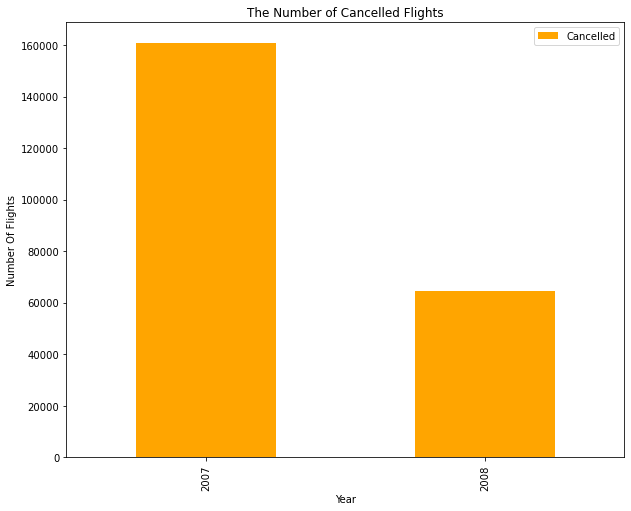

In [16]:
df_05060708_clean.groupby('Year', sort=False).sum()[['Cancelled']].plot.bar(figsize=(10,8), color='orange')
plt.title('The Number of Cancelled Flights');
plt.ylabel('Number Of Flights');

#### Comment
> From the Bar, we can see that 2007 had the most flights cancelled. But I am interested to know the cancellation causes. 

##### Lets have a look at the proportion of Cancelled flights

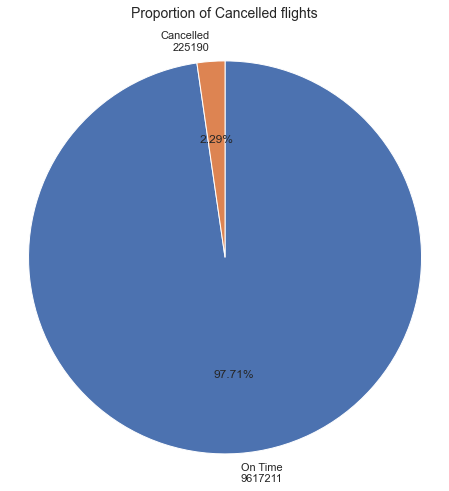

In [33]:
cancelled_flights = df_05060708_clean['Cancelled'].value_counts()
labels = f'On Time\n{cancelled_flights.values[0]}', f'Cancelled\n{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Cancelled flights\n', fontsize=14);

### <font color='orange'>  Explore 2 

##### What are the cancellation causes and how many are there in total?

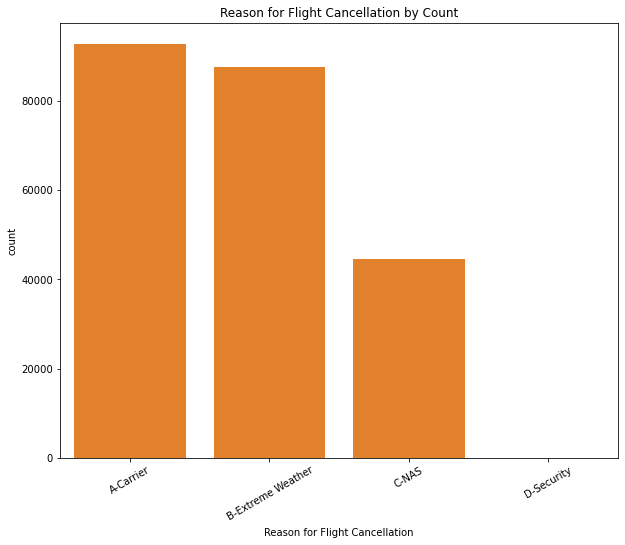

A    92854
B    87680
C    44612
D       45
Name: CancellationCode, dtype: int64

In [17]:
#Getting distribution using Seaborn bar plot 

#Define Plot
fig, ax = plt.subplots(figsize=(10,8))
base_color=sbn.color_palette()[1]
# Cancellation Codes:
#(A) Air Carrier; (B) Extreme Weather; (C) National Aviation System (NAS); and (D) Security.
sbn.countplot(data=df_05060708_clean,x='CancellationCode',color=base_color, order=['A','B','C','D'])
ax.set_xticklabels(['A-Carrier',' B-Extreme Weather','C-NAS','D-Security'], rotation = 30)
plt.title('Reason for Flight Cancellation by Count')
plt.xlabel('Reason for Flight Cancellation')

# Dsiplay the plot
plt.show()

# Get the actual number
actual_num = df_05060708_clean['CancellationCode'].value_counts()
actual_num

##### Comment 
> It is evident from the graph above that "A" (Carrier) and "B" (Weather) account for the majority of flight cancellations. But "D" (security) is the least contributing to the cancellation. We have 92854 cancellation from Carrier and 87680 extreme weather. I am also interested to see which month had the most cancellations.

### <font color='orange'> Explore 3

##### Whose cancellation rate was the highest?

Text(0, 0.5, 'count')

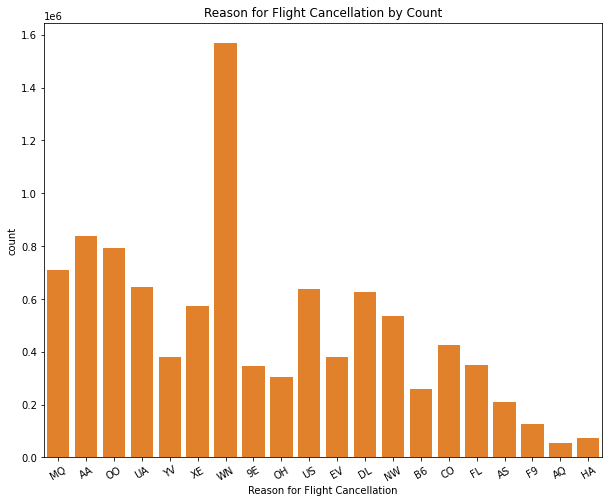

In [18]:
# Distribution of the carriers with the highest cancellation rates

# Acquiring a subset of the original dataframe that just includes the cancellation date
sub_canc = df_05060708_clean.query('CancellationCode in ["A","B","C","D"]')

# Saving value calculations for different carriers
cancellations=sub_canc.UniqueCarrier.value_counts()

#Define Plot
base_color=sbn.color_palette()[1]
plt.figure(figsize=(10,8))
g=sbn.countplot(data=df_05060708_clean,x='UniqueCarrier',color=base_color,order=cancellations.index)
g.set_xticklabels(labels=cancellations.index,rotation=30)
plt.title('Reason for Flight Cancellation by Count')
plt.xlabel('Reason for Flight Cancellation')
plt.ylabel('count')

#### Comment 
> The graph above demonstrates that the top three carriers for cancellations are MQ, AA, and OO. All four of these cancellations are included (A,B,C,D).

### <font color='orange'> Explore 4

##### Which month had the most cancellations out of the 2 years?

Text(0, 0.5, 'count')

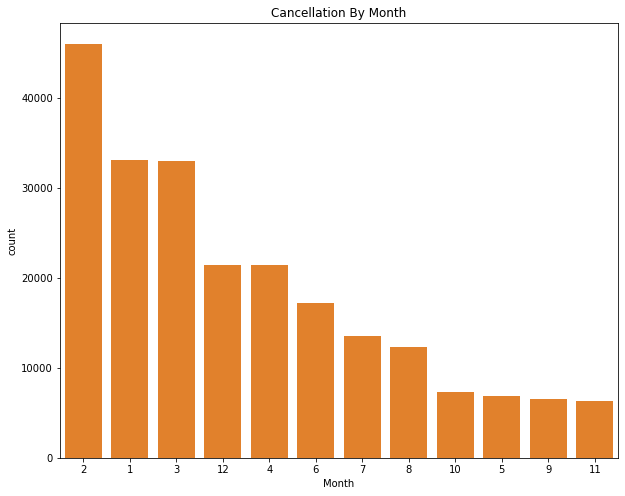

In [19]:
#Define Plot
month_order=sub_canc.Month.value_counts()
plt.figure(figsize=(10,8))
sbn.countplot(data=sub_canc,x='Month',color=base_color,order=month_order.index)
plt.title('Cancellation By Month')
plt.xlabel('Month')
plt.ylabel('count')

#### Comment
> It's interesting to observe that March and December are among the months with the highest number of cancellations. 

### <font color='orange'> Explore 5

### Delays
##### We will analyse the distribution delay first. 

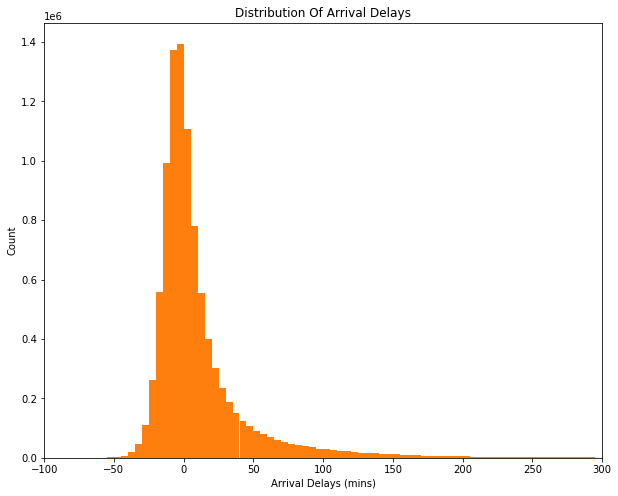

In [20]:
# Remove NaN values from the data by just filtering the ArrDelay-indicated data. If not done, an error is produced.
df_arrDelay = df_05060708_clean[df_05060708_clean.ArrDelay.notnull()]

#Define plot
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df_arrDelay.ArrDelay,bins = np.arange(-65,300,5), color=base_color)
plt.xlim(-100,300)
plt.xlabel('Arrival Delays (mins)')
plt.ylabel('Count')
plt.title('Distribution Of Arrival Delays');

# Display the plot
plt.show()

#### Comment
> After adjusting the x limits in accordance with the data, the concentration is between -60 and 300. The distribution is skewed to the right. 

### <font color='orange'> Explore 6

##### What pattern can we see in the distribution of departure delays?

Now, lets take a look at the distribution of departure delays. 

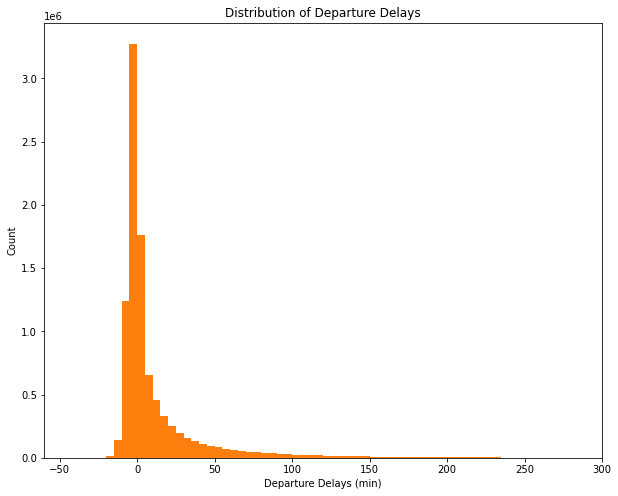

In [21]:
df_DepDelay=df_05060708_clean[df_05060708_clean.DepDelay.notnull()]
#Define plot
plt.figure(figsize=(10,8))
y=np.arange(-60,300,5)
plt.hist(df_DepDelay.DepDelay,bins=y, color=base_color)
plt.xlim(-60,300)
plt.xlabel('Departure Delays (min)')
plt.ylabel('Count')
plt.title('Distribution of Departure Delays');

#### Comment
> The distribution of departure delays is depicted in the histogram above. The graph shows that the majority of the delays fall between 0 and 50. The graph has a right-to-left tilt.

### <font color='orange'> Explore 7

##### Which airlines experienced the most arrival delays?

Let's examine how well airlines perform in terms of flights arriving on time (based on arrival delays)

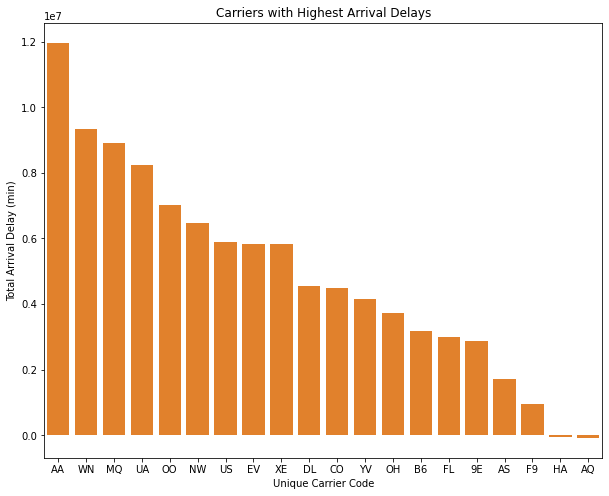

In [22]:
airline_delay=df_05060708.groupby('UniqueCarrier').ArrDelay.sum().sort_values(ascending=False)

#Define bar plot

plt.figure(figsize=(10,8))
sbn.barplot(x=airline_delay.index,y=airline_delay.values,color=base_color)
plt.xlabel('Unique Carrier Code')
plt.ylabel('Total Arrival Delay (min)')
plt.title('Carriers with Highest Arrival Delays');


#### Comment
> AA has the greatest arrival delays, as can be seen from the plot.

##### Overal Distribution Delays. 

In [34]:
# get delayed flights
delayed_flights = df_05060708_clean[df_05060708_clean['ArrDelay']>=15]

C:\Users\Moses\AppData\Local\Temp\ipykernel_7804\4118808650.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i, 1].set_xlim(0,360)


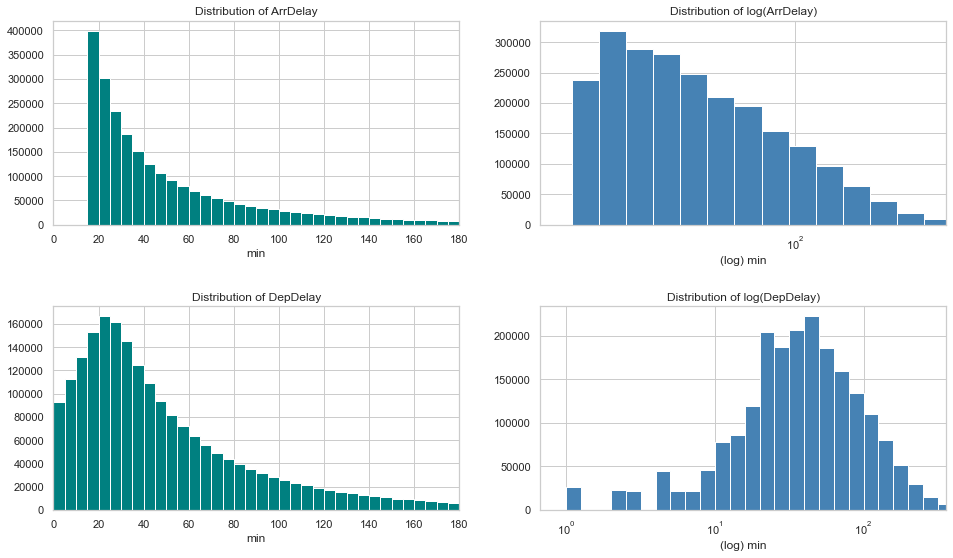

In [35]:
f, ax = plt.subplots(2, 2, figsize=(16, 9))
f.subplots_adjust(hspace=0.4)

for i, j in enumerate(['ArrDelay', 'DepDelay']):
    binsize=5
    data = delayed_flights[delayed_flights[j]>0]
    bin_edges = np.arange(0, data[j].max()+binsize, binsize)
    ax[i, 0].hist(data[j], bins = bin_edges, color='teal')
    ax[i, 0].set_xlabel('min');
    ax[i, 0].set_title(f'Distribution of {j}');
    ax[i, 0].set_xlim(0,180)

    # figure right
    binsize=0.1
    bin_edges = 10 ** np.arange(np.log10(data[j].min()), np.log10(data[j].max())+binsize, binsize)
    ax[i, 1].hist(data=data, x = j, bins=bin_edges, color='steelblue')
    ax[i, 1].set_xscale('log')
    ax[i, 1].set_xlim(0,360)
    ax[i, 1].set_xlabel('(log) min');
    ax[i, 1].set_title(f'Distribution of log({j})');

#### Univariate Notes

>All three dataframes were appended and saved into the master df, "df_05060708."

>We looked at cancellation codes, carrier codes with cancellations, and the times of year when cancellations were most common in the graphs above.

>Security cancellation code "D" has an extremely low cancellation rate compared to other codes. This indicates that there haven't been many instances of delays or cancellations brought on by security concerns. 

>In order to understand the distribution of flight delays, we also looked at the departure and arrival times. Since the majority of the data is concentrated on the x axis, we have to alter the histogram for these. ns.

>We altered the original dataset and filtered just those rows that had cancellations in order to investigate the carriers that experienced cancellations (A,B,C or D). Then, we would be able to calculate and track carrier cancellations.

>We constructed new dataframes that did not include NaN (missing) values for delays in order to plot histograms and examine delays. 

## 2. Bivariate Exploration

> We will look into the connections between two variables in this section.

### <font color='orange'> Explore 1

##### What connection is there between delays in arrival and departure?

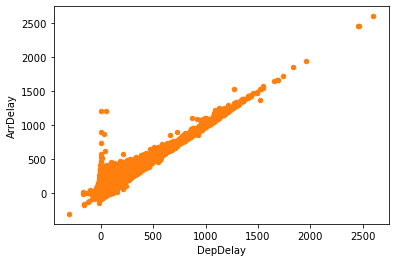

In [23]:
df_05060708_clean.plot.scatter(x='DepDelay', y='ArrDelay', color=base_color)
plt.show()

#### Comment
> A linear relationship between departure and arrival delays is depicted in the plot above. But it still looks busy. 

### <font color='orange'> Explore 2

##### Which month had the highest number of cancellations for each cancellation code (reason)? What can be inferred about the seasons from this information?

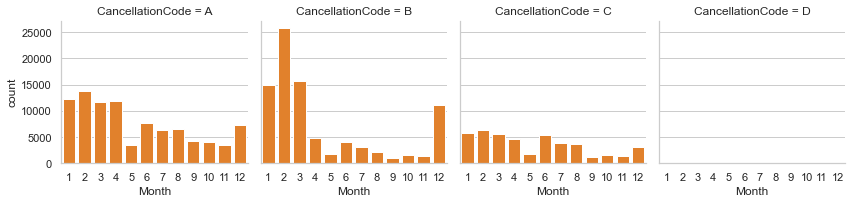

In [24]:
#Define plot
sbn.set_theme(style="whitegrid")
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sbn.FacetGrid(data=sub_canc,col='CancellationCode')
g.map(sbn.countplot,'Month',order=month_order, color=base_color)

#### Comment
>The plot above for "B" demonstrates that the greatest cancellations occurred in the months of December, January, February, and March. Since "B" is cancellations due to weather, this may be the case, but we'll look at other scenarios later.

### <font color='orange'> Explore 3

##### Flight count by cancellation code breakdown

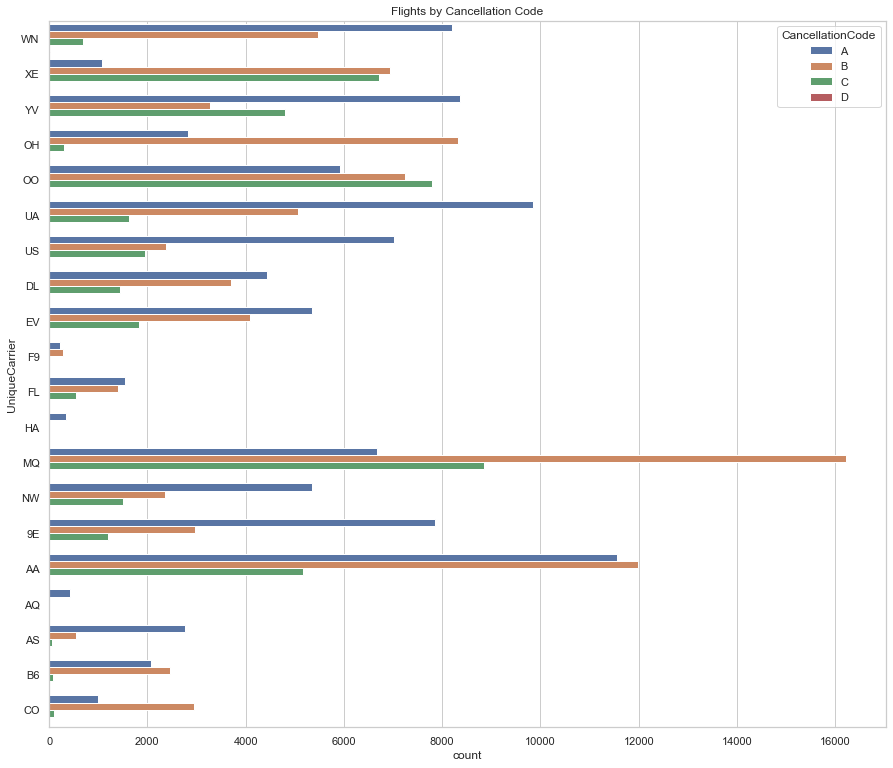

In [25]:
#Define plot
fig, ax = plt.subplots(figsize=(15,13))
sbn.countplot(data = df_05060708_clean, y='UniqueCarrier', hue='CancellationCode')
plt.title('Flights by Cancellation Code')
plt.show()

#### Comment
>The breakdown of cancellation codes for each carrier is depicted in this graph. We can deduce from this that Cancellation Codes A and B are the most prevalent, whereas D is associated with the fewest cancellations.

>Due to the designation "A," which stands for Carriers, UA has the highest cancellation rate.

>The most cancellations occur on MQ, which stands for Extreme Weather and NAS, respectively.

>Due to the code "D," which stands for security, XE, has the highest cancellation rate.

### <font color='orange'> Explore 4

##### Lets Look at Delays by month

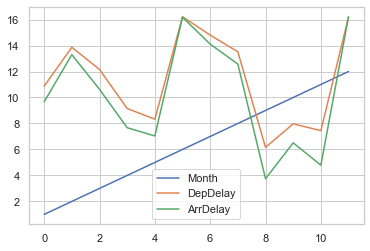

In [26]:
x = df_05060708_clean.groupby(['Month'], as_index=False).agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

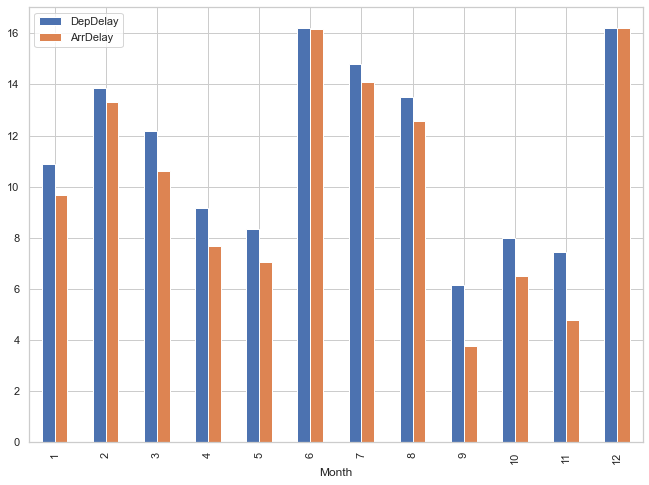

In [27]:
df_05060708_clean.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.rcParams["figure.figsize"] = (11,8)
plt.show()


#### Comment
> The worst months to fly were May and December, while September and November seem promising.

### <font color='orange'> Explore 5

##### What is the relationship between flight distances and mean arrival delay?

<AxesSubplot:xlabel='distance', ylabel='avg_arrival_delay'>

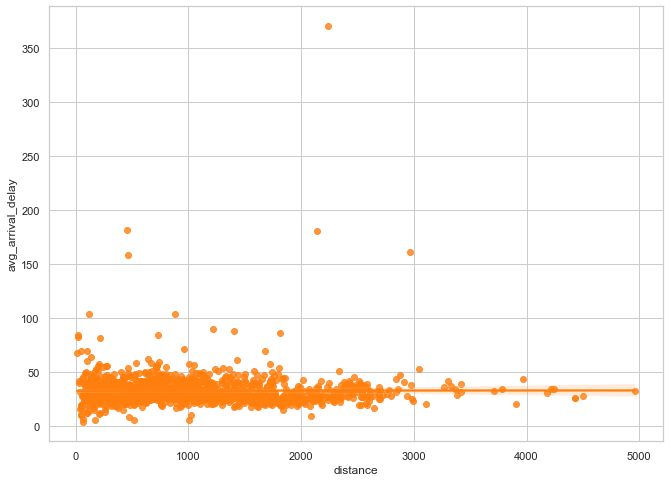

In [29]:
# Average arrival delay by distance for the pandas series
distance_arrival=df_05060708_clean.query('ArrDelay>0').groupby('Distance')['ArrDelay'].mean()
plt.figure(figsize=(11,8))

#the series' conversion for the Seaborn plot
x,y=pd.Series(distance_arrival.index,name='distance'),pd.Series(distance_arrival.values,name='avg_arrival_delay')
sbn.regplot(x=x,y=y, color=base_color)

#### Comment 
>As the distance between airports grows, we can see from the graph above that neither an increasing nor a reducing trend can be seen in the average delay.
Between departure and arrival delays, we discovered a linear relationship. There was no correlation between cab outtime and departure delay.
In multivariate exploration, the relationship between departure and arrival delays needs to be further examined. We must specifically check for patterns in taxi departure times and delays brought on by inclement weather and other factors. The plot cannot be used to prove correlation or causation.

## 3. Multivariate Exploration

We will carry out more research on our interest factors in this part. To see if there is a relationship, we will add three variables this time.

### <font color='orange'> Explore 1

##### Does the number of flights to destinations have an effect on arrival delays?

In [65]:
#Groups by destination and gets number of flights for each destination
group_destination = df_05060708.groupby('Dest').size().sort_values(ascending=False)
group_destination = group_destination.reset_index(name = 'NumberOfFlights')

#Group by destination and calculate the mean of arrival delay for each destination
group_arrdelay = df_05060708.groupby('Dest')['ArrDelay'].mean()
group_arrdelay = group_arrdelay.reset_index(name = 'AvgArrivalDelay')
#group_arrdelay

#merge the two dataframes into one on 'Dest'
Dest_delay = group_destination.merge(group_arrdelay,on='Dest')

Dest_delay['TopDest'] = np.nan

#Set Dest Ranking for every 20 records
Dest_delay.iloc[:20,3]='Rank 1-20'
Dest_delay.iloc[20:40,3]='Rank 21-40'
Dest_delay.iloc[40:60,3]='Rank 41-60'
Dest_delay.iloc[60:80,3]='Rank 61-80'
Dest_delay.iloc[80:100,3]='Rank 81-100'

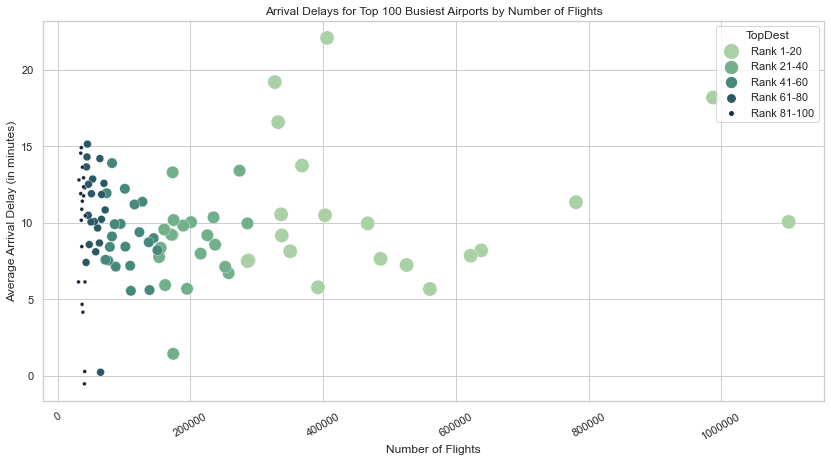

In [83]:
#Define plot
plt.figure(figsize = [14,7])
axes = sbn.scatterplot(data = Dest_delay, x = 'NumberOfFlights', y = 'AvgArrivalDelay',hue='TopDest', size="TopDest",  sizes=(15, 200) ,palette="ch:r=-.5,l=.75")
axes.set_xticklabels(['','0','200000','400000','600000','800000','1000000','1200000', '1400000'], rotation = 30)
plt.xlabel('Number of Flights');
plt.ylabel('Average Arrival Delay (in minutes)');
plt.title('Arrival Delays for Top 100 Busiest Airports by Number of Flights')

# Dsiplay the plot
plt.show();

#### Comment
> According to the graph above, there is a correlation between the number of flights and the average arrival delay for the top 50 busiest destinations. This is less true for airports ranked 51–100 that have less traffic.

### <font color='orange'> Explore 2

##### Finding the relation between delays and their Reasons

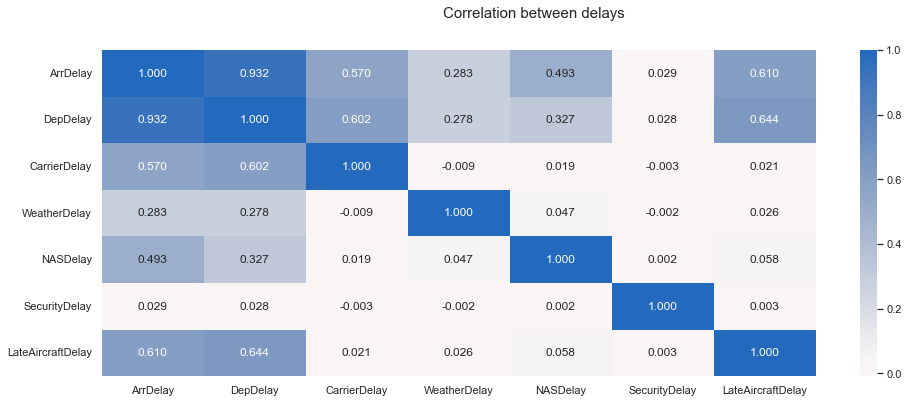

In [38]:
plt.figure(figsize=(16, 6))
sbn.heatmap(df_05060708_clean[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.suptitle('Correlation between delays', size=15);

#### Comment
> We can see that there is a relationship between the carrier delay and the late aircraft delay, the nas delay and the carrier delay, as well as the weather delay and the carrier delay.

> The results of multivariate analysis support the conclusion that delays were primarily caused by the weather. Additionally, it is clear that longer flights with greater distances generally arrive later than shorter flights.